In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data/spotify.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


# EXPLORATORY DATA ANALYSIS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [4]:
df.shape

(174389, 19)

In [5]:
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [6]:
df.duplicated().sum()

2159

In [7]:
# examine duplicated rows
df.loc[df.duplicated(), :]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9525,0.56700,['Neil Diamond'],0.515,180253,0.6410,0,1BmVQ5RGqqtF5cnsv6cQYu,0.064200,5,0.3220,-5.573,1,"Girl, You'll Be A Woman Soon",60,1968,0.0272,109.558,0.655,1968
9534,0.02710,['Neil Diamond'],0.560,163907,0.8270,0,2SS3WeSe24ZqTlTSK4KzQZ,0.002850,8,0.0551,-4.157,1,Cherry Cherry,54,1968,0.0306,84.383,0.904,1968
16113,0.97400,"['Johann Strauss II', 'Riccardo Muti', 'Wiener...",0.219,459053,0.0855,0,5zZbXSRIFe1uWNmEM7f2XI,0.922000,0,0.3550,-19.703,0,"Frühlingsstimmen, Walzer, Op. 410",34,2021-01-08,0.0404,171.849,0.156,2021
16663,0.35500,"['Waylon Jennings', 'Willie Nelson']",0.626,184267,0.4570,0,0sFq478LIo9BFwf2qzMzzF,0.000009,4,0.0668,-13.785,1,The Year 2003 Minus 25 - Remastered,43,1978-01-01,0.0384,102.166,0.474,1978
16669,0.20200,['Ten Years After'],0.384,224133,0.5160,0,19HjHUjCfDrEYhVSIKG6nK,0.180000,9,0.1140,-12.032,0,I'd Love to Change the World - 2004 Remaster,60,1971-11-11,0.0345,118.129,0.371,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174380,0.04840,"['Stephan F', 'YA-YA']",0.693,177148,0.8260,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.2310,-2.669,1,Only Tonight - Radio Edit,0,2020-12-25,0.0762,126.049,0.361,2020
174382,0.14100,"['BigBankCarti', 'Keyvo400']",0.544,215014,0.4070,1,3ASGdyWXeXsXtOIWtm0tv4,0.000000,4,0.2530,-12.745,0,LayUp,0,2020-12-31,0.2330,129.750,0.490,2020
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.8660,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174386,0.80600,['Roger Fly'],0.671,218147,0.5890,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020


In [8]:
data = df.drop_duplicates(keep="first")

In [9]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174379,0.795000,['Alessia Cara'],0.429,144720,0.211,0,45XnLMuqf3vRfskEAMUeCH,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174381,0.795000,['Alessia Cara'],0.429,144720,0.211,0,4pPFI9jsguIh3wC7Otoyy8,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174383,0.795000,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021


In [10]:
df1 = df.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])
df1.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
acousticness,1.000000,-0.263217,-0.089169,-0.750852,-0.208176,0.221956,-0.028028,-0.029654,-0.546639,0.064633,-0.396744,-0.022437,-0.223840,-0.166968
danceability,-0.263217,1.000000,-0.100757,0.204838,0.200842,-0.215589,0.026266,-0.110033,0.249541,-0.048358,0.123746,0.239962,0.005479,0.536713
duration_ms,-0.089169,-0.100757,1.000000,0.060516,-0.033808,0.103621,0.002020,0.028942,0.019791,-0.046849,0.024717,-0.097838,-0.008182,-0.183199
energy,-0.750852,0.204838,0.060516,1.000000,0.102561,-0.177750,0.035780,0.134815,0.779267,-0.056160,0.328939,-0.112616,0.266448,0.326418
explicit,-0.208176,0.200842,-0.033808,0.102561,1.000000,-0.130609,0.005282,0.037288,0.106249,-0.062503,0.152545,0.353872,0.008075,-0.009275
instrumentalness,0.221956,-0.215589,0.103621,-0.177750,-0.130609,1.000000,-0.004619,-0.047941,-0.317562,-0.056731,-0.300625,-0.133966,-0.068656,-0.219188
key,-0.028028,0.026266,0.002020,0.035780,0.005282,-0.004619,1.000000,-0.003368,0.025227,-0.127397,0.001951,0.009648,0.005009,0.025592
liveness,-0.029654,-0.110033,0.028942,0.134815,0.037288,-0.047941,-0.003368,1.000000,0.062695,0.001677,-0.078959,0.122034,0.008586,-0.005781
loudness,-0.546639,0.249541,0.019791,0.779267,0.106249,-0.317562,0.025227,0.062695,1.000000,-0.019250,0.337194,-0.213504,0.217914,0.302520
mode,0.064633,-0.048358,-0.046849,-0.056160,-0.062503,-0.056731,-0.127397,0.001677,-0.019250,1.000000,0.007652,-0.040711,0.002438,0.021592


#  VISUALIZATION

In [11]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))

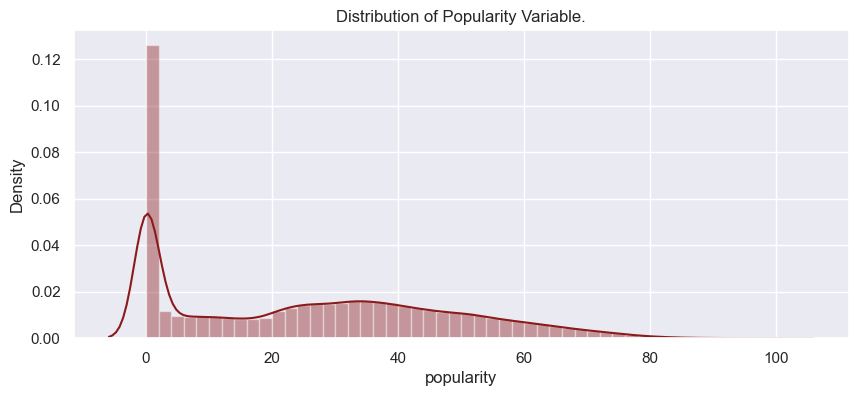

In [12]:
plt.figure(figsize=(10,4))
plt.title("Distribution of Popularity Variable.")
sns.distplot(data['popularity'],color='#8B1A1A');

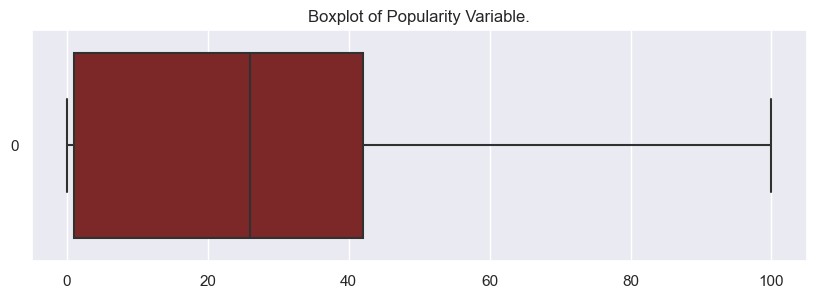

In [13]:
plt.figure(figsize=(10,3))
plt.title("Boxplot of Popularity Variable.")
sns.boxplot(data=data['popularity'],color='#8B1A1A',orient='horizontal');

In [14]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

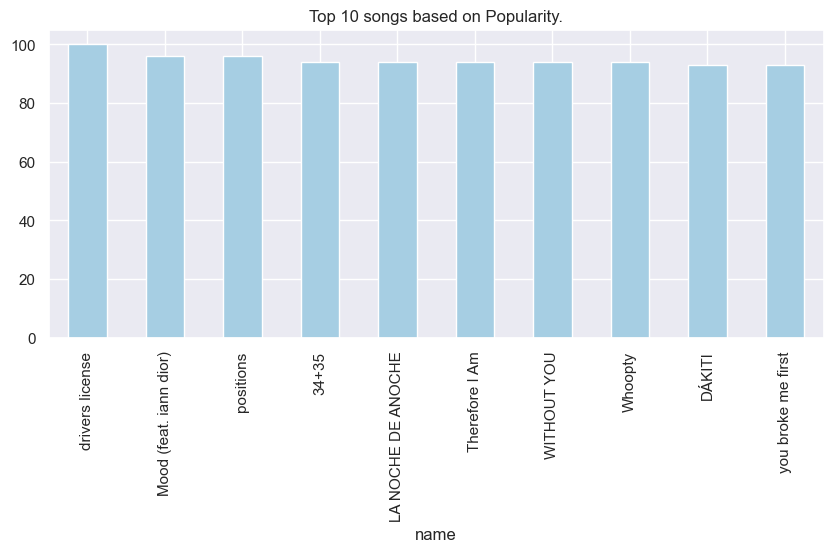

In [15]:
plt.figure(figsize=(10,4))
plt.title("Top 10 songs based on Popularity.")
data.groupby('name').mean()['popularity'].sort_values(ascending=False).head(10).plot(kind='bar',colormap='Paired');

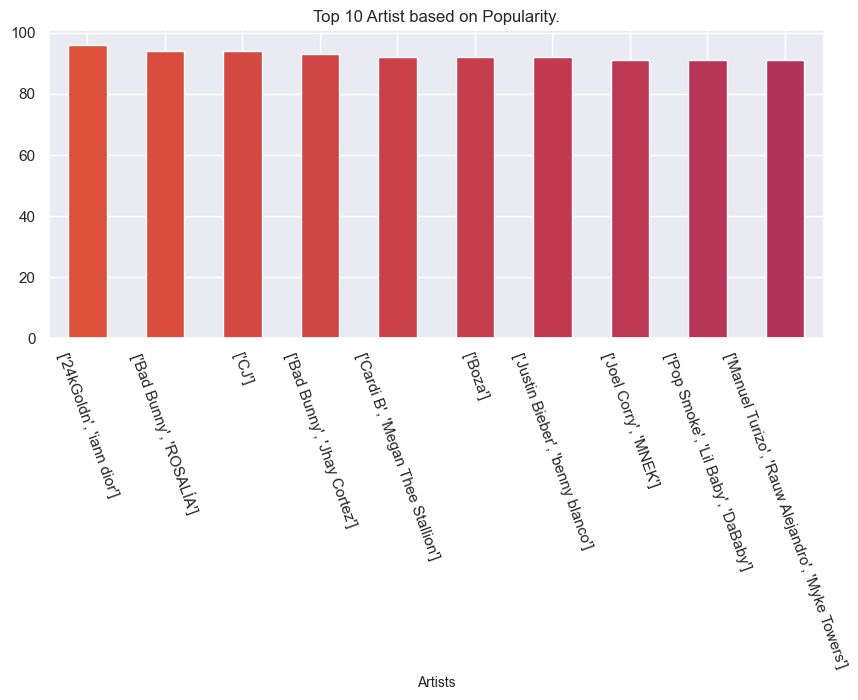

In [16]:
plt.figure(figsize=(10,4))
plt.title("Top 10 Artist based on Popularity.")
data.groupby('artists').mean()['popularity'].sort_values(ascending=False).head(10).plot(kind='bar',color=color,stacked=True)
plt.xlabel('Artists',fontsize=10)
plt.xticks(rotation=-70);

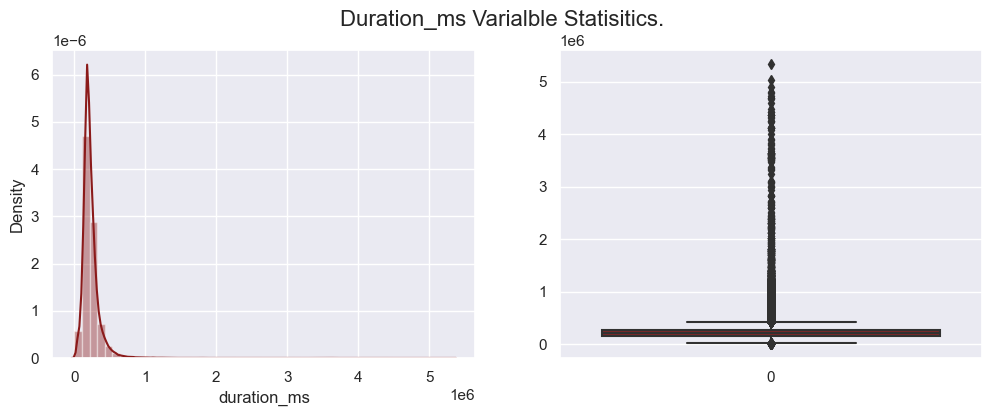

In [17]:
plt.figure(figsize=(12,4))
plt.suptitle("Duration_ms Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['duration_ms'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['duration_ms'],color='#8B1A1A');

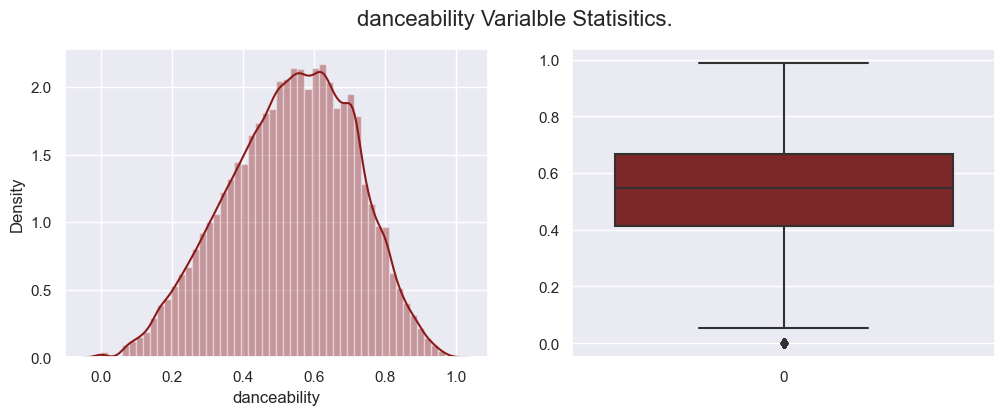

In [18]:
plt.figure(figsize=(12,4))
plt.suptitle("danceability Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['danceability'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['danceability'],color='#8B1A1A');

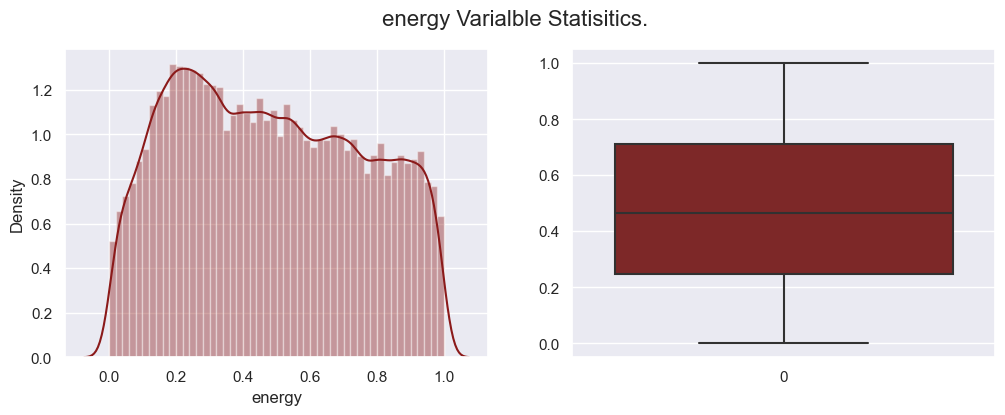

In [19]:
plt.figure(figsize=(12,4))
plt.suptitle("energy Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['energy'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['energy'],color='#8B1A1A');

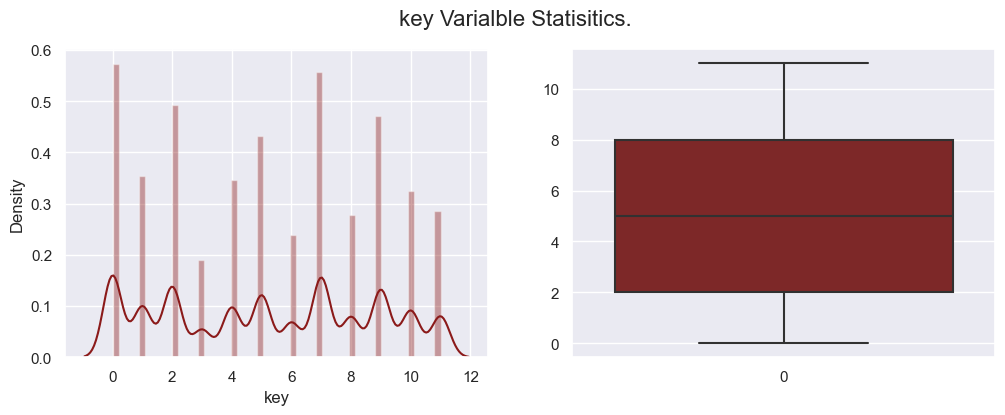

In [20]:
plt.figure(figsize=(12,4))
plt.suptitle("key Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['key'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['key'],color='#8B1A1A');

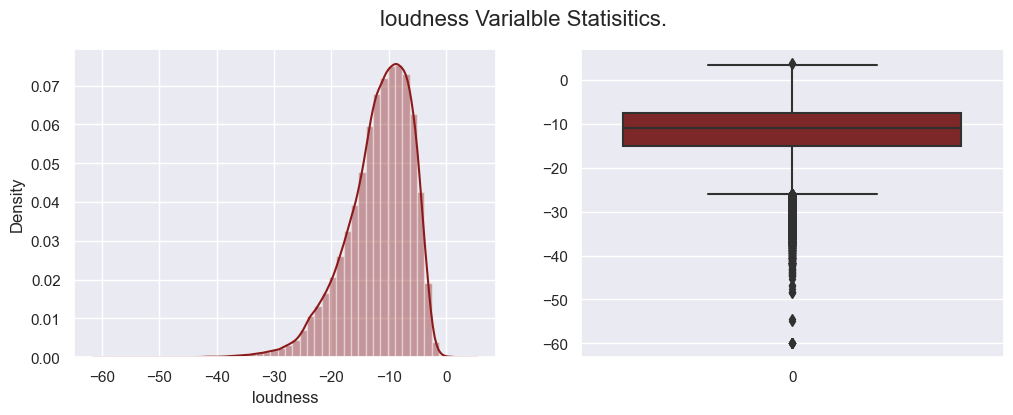

In [21]:
plt.figure(figsize=(12,4))
plt.suptitle("loudness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['loudness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['loudness'],color='#8B1A1A');

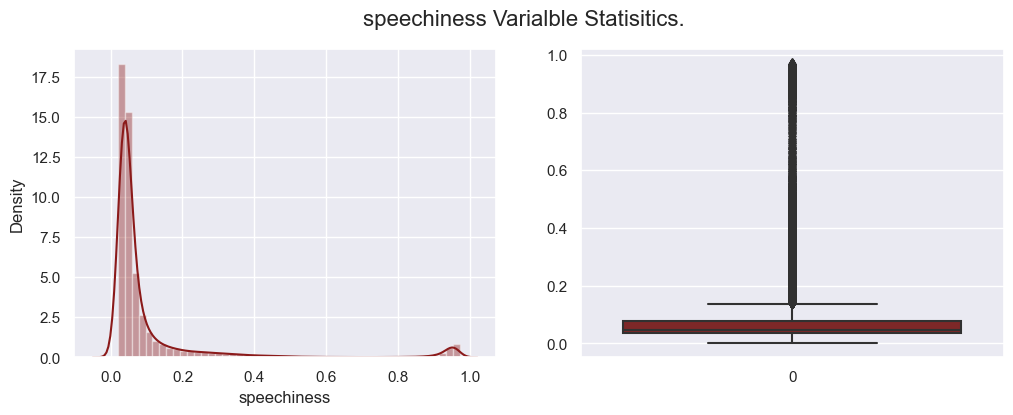

In [22]:
plt.figure(figsize=(12,4))
plt.suptitle("speechiness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['speechiness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['speechiness'],color='#8B1A1A');

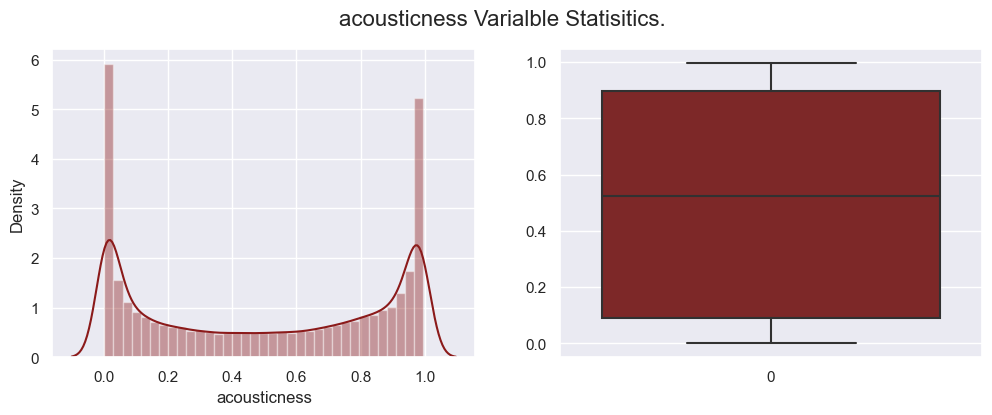

In [23]:
plt.figure(figsize=(12,4))
plt.suptitle("acousticness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['acousticness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['acousticness'],color='#8B1A1A');

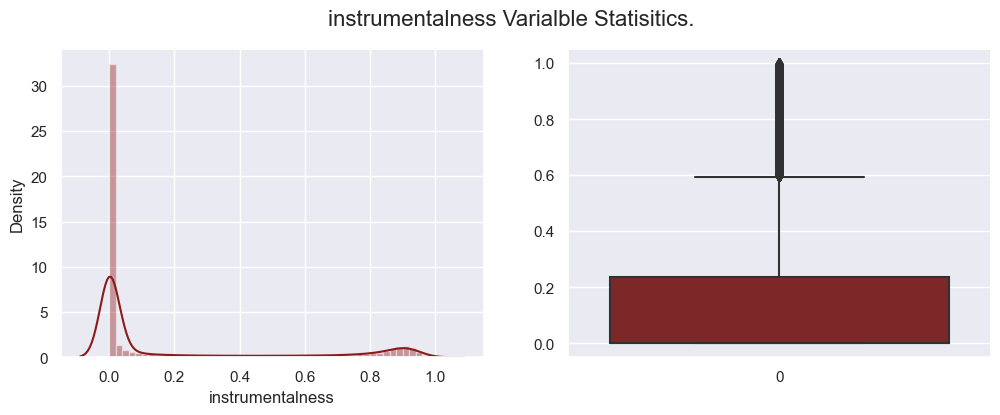

In [24]:
plt.figure(figsize=(12,4))
plt.suptitle("instrumentalness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['instrumentalness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['instrumentalness'],color='#8B1A1A');

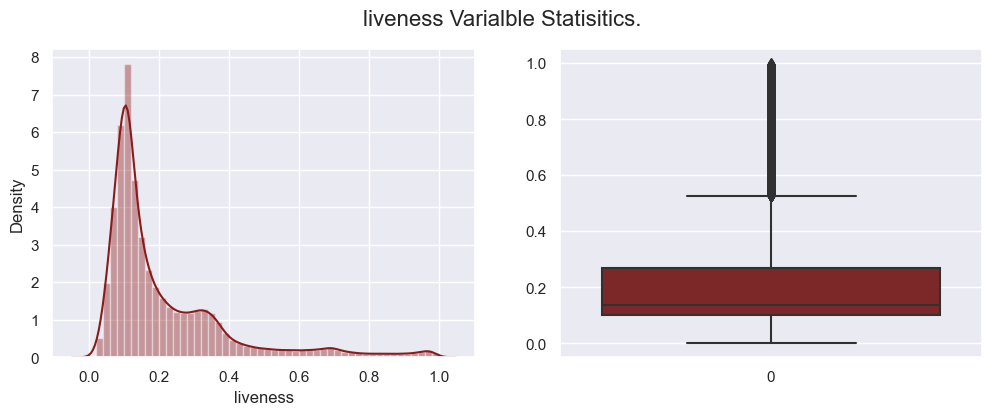

In [25]:
plt.figure(figsize=(12,4))
plt.suptitle("liveness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['liveness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['liveness'],color='#8B1A1A');

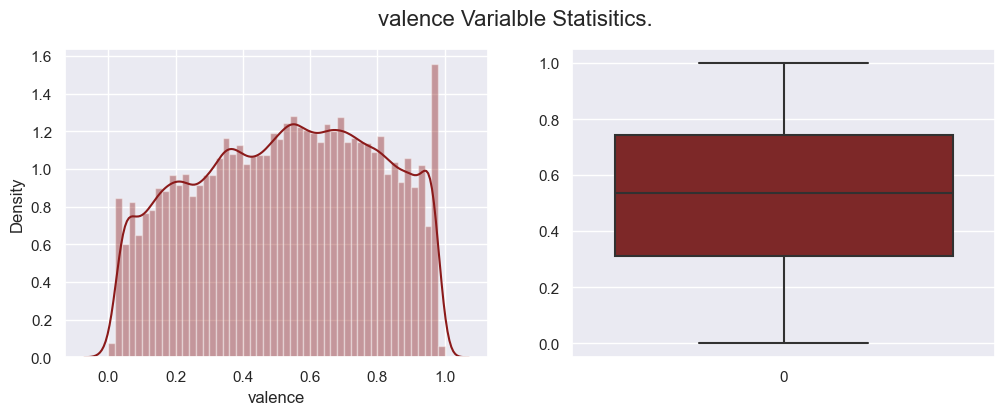

In [26]:
plt.figure(figsize=(12,4))
plt.suptitle("valence Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['valence'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['valence'],color='#8B1A1A');

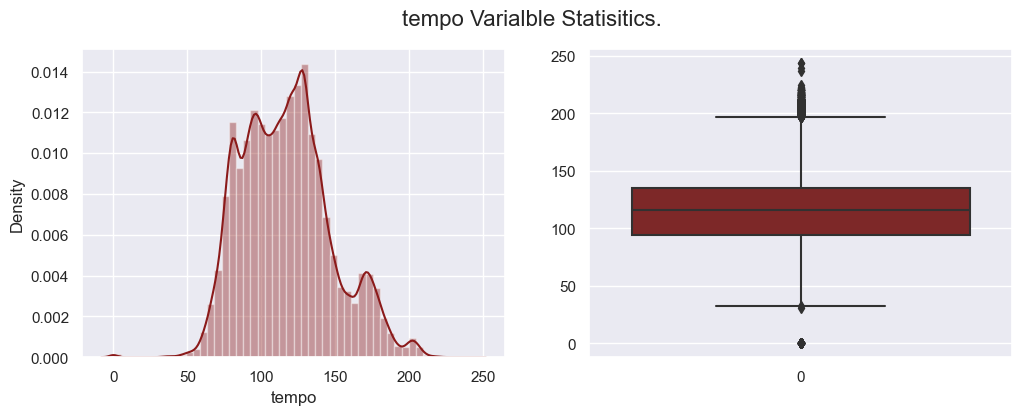

In [27]:
plt.figure(figsize=(12,4))
plt.suptitle("tempo Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['tempo'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['tempo'],color='#8B1A1A');

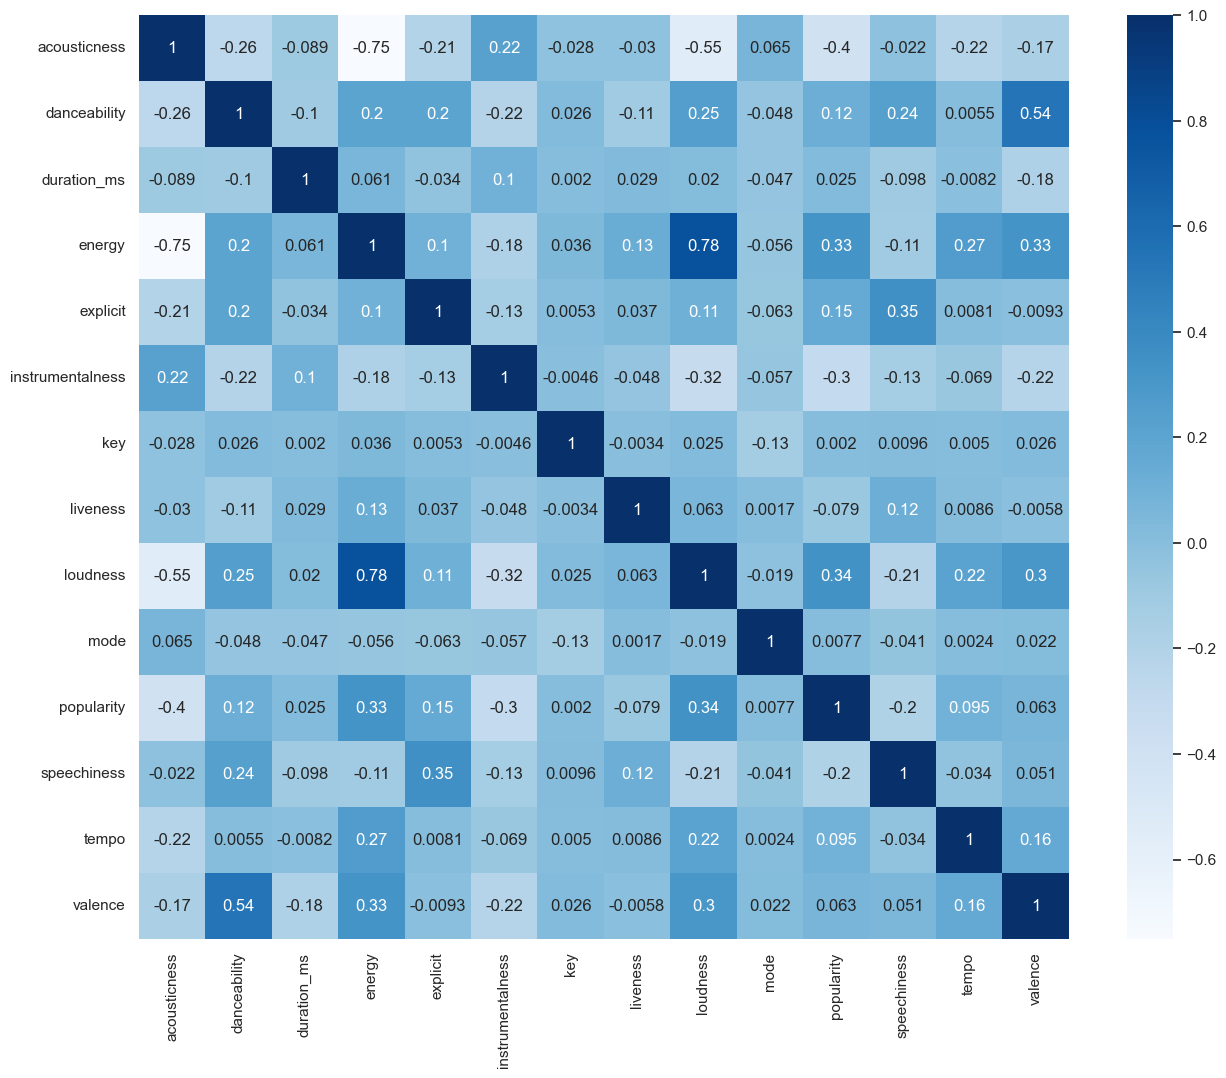

In [28]:
plt.figure(figsize=(15,12))
sns.heatmap(df1.corr(),annot=True,cmap='Blues')
plt.show()

# MODEL BUILDING

## Content based Recommendation system

In [29]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = data.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

Here I will normalize all the numerical columns, for that, I will be selecting all the columns with int and float datatypes.

In [30]:
from sklearn.cluster import KMeans

In [31]:
TWSS = []
k = list(range(1, 15))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

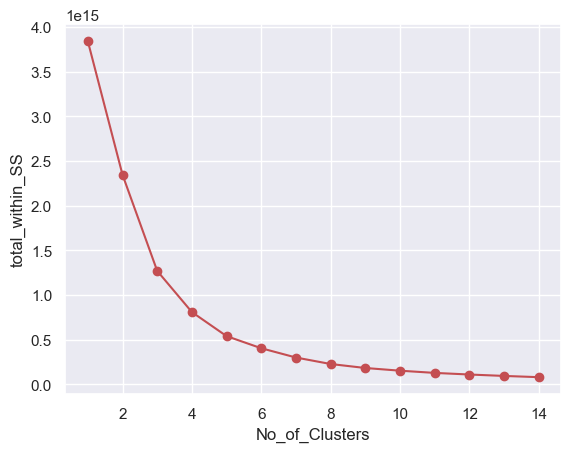

In [32]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)
data['features'] = features
MinMaxScaler(data['features'])

MinMaxScaler(feature_range=0         0
1         0
2         0
3         1
4         0
         ..
174379    0
174381    0
174383    0
174385    0
174387    8
Name: features, Length: 172230, dtype: int32)

In [34]:
model = KMeans(n_clusters = 10) 
model.fit(df1)

KMeans(n_clusters=10)

In [35]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
df1['clust'] = mb # creating a  new column and assigning it to new column

In [36]:
df1.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,5
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,5
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,5
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,7
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,5


In [37]:
df2 = pd.concat([df1, data['name']], axis = 1)
df2

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,5,Keep A Song In Your Soul
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,5,I Put A Spell On You
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,5,Golfing Papa
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,7,True House Music - Xavier Santos & Carlos Gomi...
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,5,Xuniverxe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,0.792,147615,0.866,0,0.000060,6,0.1780,-5.089,0,0,0.0356,125.972,0.1860,5,NaN
174385,0.795000,0.429,144720,0.211,0,0.000000,4,0.1960,-11.665,1,0,0.0360,94.710,0.2280,5,A Little More
174386,0.806000,0.671,218147,0.589,0,0.920000,4,0.1130,-12.393,0,0,0.0282,108.058,0.7140,9,NaN
174387,0.920000,0.462,244000,0.240,1,0.000000,0,0.1130,-12.077,1,69,0.0377,171.319,0.3200,9,champagne problems


In [38]:
df3 = df2.dropna()

In [39]:
df3[df3['clust']==0]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
51,0.3650,0.565,128500,0.255,1,0.000287,10,0.3210,-30.644,1,0,0.0480,94.519,0.7250,0,Indios Cheroqui (Live) [feat. Ariel Flores & S...
55,0.4350,0.680,88696,0.939,0,0.879000,6,0.0924,-5.458,1,0,0.0649,183.958,0.9240,0,Playground Sparks
72,0.0828,0.854,77477,0.555,1,0.315000,10,0.0883,-8.474,0,0,0.0747,81.015,0.5430,0,Trap em Casa
73,0.7760,0.792,129287,0.532,0,0.000000,2,0.1600,-15.461,0,1,0.3280,122.403,0.5450,0,Nugget
74,0.2140,0.890,117816,0.413,1,0.000000,1,0.1390,-9.613,1,0,0.2260,92.484,0.3080,0,Wock(y)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174180,0.3850,0.627,128232,0.848,0,0.000001,8,0.2310,-2.899,1,3,0.0311,132.806,0.9420,0,Common Enemy
174184,0.9360,0.251,90535,0.326,0,0.030400,0,0.2190,-7.198,1,3,0.0314,154.407,0.0651,0,King of the Blind
174185,0.2630,0.760,109595,0.794,1,0.003240,10,0.0996,-4.311,0,68,0.3440,165.990,0.5830,0,Crisis
174311,0.6150,0.659,60347,0.326,0,0.000000,8,0.1830,-14.251,1,60,0.5030,116.004,0.5690,0,Rashida's Tale


In [40]:
df3[df3['clust']==1]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,clust,name
708,0.984000,0.372,1031014,0.0909,0,0.854000,2,0.0770,-24.959,1,0,0.0557,71.866,0.1010,1,Rhapsody in Blue (for piano 4 hands)
3421,0.963000,0.228,1205133,0.1490,0,0.013400,1,0.0892,-18.158,1,0,0.0404,130.715,0.0363,1,"Starke Scheite schichtet mir dort (Brünnhilde,..."
3495,0.423000,0.611,1002107,0.3870,0,0.842000,9,0.0998,-15.965,0,11,0.0785,116.467,0.3850,1,Honeysuckle Rose - Live
4440,0.933000,0.118,1001307,0.1230,0,0.702000,2,0.2470,-19.084,1,0,0.0407,73.037,0.0697,1,"Symphony No. 6 in B Minor, Op 74 ""Pathétique"":..."
4525,0.701000,0.286,1255747,0.3410,0,0.123000,1,0.1640,-9.024,1,2,0.0353,123.756,0.0767,1,El Tholathya Al Moqadasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169030,0.000575,0.306,1388720,0.8060,0,0.031000,4,0.1030,-6.630,0,43,0.0562,115.709,0.2250,1,A Change of Seasons - The Crimson Sunrise / In...
170083,0.210000,0.102,1352413,0.6140,0,0.714000,3,0.0996,-9.433,1,46,0.0649,182.349,0.0379,1,Storm
170112,0.681000,0.365,1085826,0.4800,0,0.000147,0,0.9610,-12.559,1,0,0.1390,144.704,0.4040,1,Big Deaner's Rolling Stone
170586,0.322000,0.613,1198067,0.7330,0,0.000003,0,0.5050,-6.332,1,44,0.0707,115.853,0.8630,1,Apache Mix


In [41]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [1, 6, 12, 14, 18]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artists', 'name']
        return rec[columns][:amount]

In [53]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        try:
            distance = []
            song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
            dataset_without_the_song = self.dataset[self.dataset.name.str.lower() != songs.lower()]
            for i in tqdm(dataset_without_the_song.values):
                d = 0
                for col in np.arange(len(dataset_without_the_song.columns)):
                    if not col in [1, 6, 12, 14, 18]:
                        d = d + np.absolute(float(song[col]) - float(i[col]))
                distance.append(d)
            dataset_without_the_song['distance'] = distance
            dataset_without_the_song = dataset_without_the_song.sort_values('distance')
            columns = ['artists', 'name']
            return dataset_without_the_song[columns][:amount]
        except:
            return "No data is availabe for the song You entered."

In [44]:
data.to_csv('Data/finaldata.csv',index=False)

In [55]:
recommendations = Spotify_Recommendation(data)
recommendations.recommend("does it feel", 10)

'No data is availabe for the song You entered.'

# Popularity Based Recommedation System 

In [46]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,features
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,1
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,0


In [47]:
data1 = data.groupby('name').mean()['popularity'].sort_values(ascending=False).head(10)

In [48]:
data1

name
drivers license           100.0
Mood (feat. iann dior)     96.0
positions                  96.0
34+35                      94.0
LA NOCHE DE ANOCHE         94.0
Therefore I Am             94.0
WITHOUT YOU                94.0
Whoopty                    94.0
DÁKITI                     93.0
you broke me first         93.0
Name: popularity, dtype: float64